# 미니 배치(Mini Batch)
> 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념

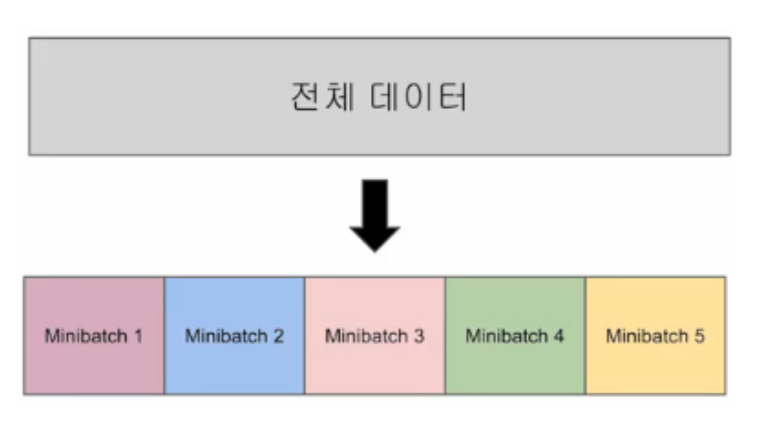

  - 미니 배치만큼만 가져가서 미니 배치에 대한 비용을 계산하고 그만큼만 경사 하강법을 수행
    - ``미니 배치 경사 하강법``
  - 전체 데이터에 대한 학습이 1회 끝나면 1 Epoch가 끝나는 것이다.
  - 미니 배치의 크기 : ``배치 크기(batch size)``
    - 배치 크기는 보통 2의 제곱수를 사용한다



---
# 이터레이션(Iteration)
> 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수이다.

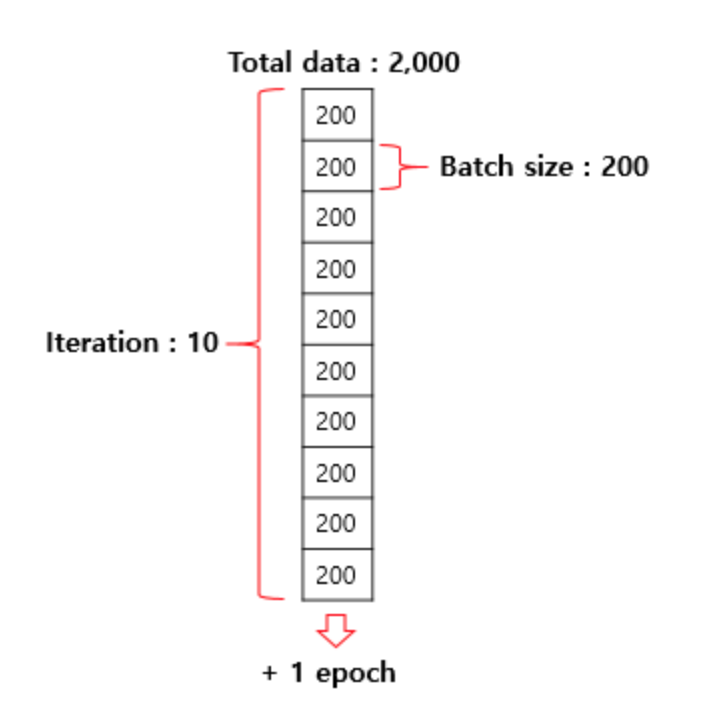


  - 전체 데이터 2000, 배치 크기 200 -> 이터레이션의 수: 총 10개
    - 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다.    

### Train

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [5]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [9]:
# 데이터셋을 만들었다면, 데이터로더를 사용 가능하다
dataset = TensorDataset(x_train, y_train)

In [10]:
# 데이터셋, 미니배치 크기, shuffle은 에폭마다 데이터셋을 섞어서 데이터가 학습이다 되는 형태
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [12]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [16]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad() #초기화
    cost.backward()
    optimizer.step() # 업데이트

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 3.650944
Epoch    0/20 Batch 2/3 Cost: 1.121665
Epoch    0/20 Batch 3/3 Cost: 5.131259
Epoch    1/20 Batch 1/3 Cost: 2.333310
Epoch    1/20 Batch 2/3 Cost: 5.371511
Epoch    1/20 Batch 3/3 Cost: 1.676032
Epoch    2/20 Batch 1/3 Cost: 3.719433
Epoch    2/20 Batch 2/3 Cost: 2.140112
Epoch    2/20 Batch 3/3 Cost: 1.831013
Epoch    3/20 Batch 1/3 Cost: 5.858941
Epoch    3/20 Batch 2/3 Cost: 2.759168
Epoch    3/20 Batch 3/3 Cost: 1.087625
Epoch    4/20 Batch 1/3 Cost: 2.990328
Epoch    4/20 Batch 2/3 Cost: 3.317160
Epoch    4/20 Batch 3/3 Cost: 1.697435
Epoch    5/20 Batch 1/3 Cost: 2.602174
Epoch    5/20 Batch 2/3 Cost: 3.225941
Epoch    5/20 Batch 3/3 Cost: 1.822475
Epoch    6/20 Batch 1/3 Cost: 0.566058
Epoch    6/20 Batch 2/3 Cost: 7.285059
Epoch    6/20 Batch 3/3 Cost: 2.188085
Epoch    7/20 Batch 1/3 Cost: 2.670473
Epoch    7/20 Batch 2/3 Cost: 3.197697
Epoch    7/20 Batch 3/3 Cost: 1.458435
Epoch    8/20 Batch 1/3 Cost: 0.276936
Epoch    8/20 Batch 2/3 C

### Predict

In [31]:
new_var = torch.FloatTensor([[73, 80, 75]])

In [32]:
pred_y = model(new_var)

In [33]:
pred_y

tensor([[153.8294]], grad_fn=<AddmmBackward0>)